In [202]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [203]:
df = pd.read_csv('titanic_train.csv')

In [204]:
df.shape

(891, 12)

In [205]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [206]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [207]:
null_perc = df.isna().sum() / len(df)
null_perc.apply(lambda x: f"{x:.1%}")

PassengerId     0.0%
Survived        0.0%
Pclass          0.0%
Name            0.0%
Sex             0.0%
Age            19.9%
SibSp           0.0%
Parch           0.0%
Ticket          0.0%
Fare            0.0%
Cabin          77.1%
Embarked        0.2%
dtype: object

In [208]:
from sklearn.impute import SimpleImputer
# Imputamos con la media
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df[['Age']])
df['Age']=imputer.transform(df[['Age']])

In [209]:
# Imputamos con el valor mas frecuente
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(df[['Cabin']])
df['Cabin']=imputer.transform(df[['Cabin']])

In [210]:
df = df.dropna(subset=['Embarked'])

In [211]:
null_perc = df.isna().sum() / len(df)
null_perc.apply(lambda x: f"{x:.1%}")

PassengerId    0.0%
Survived       0.0%
Pclass         0.0%
Name           0.0%
Sex            0.0%
Age            0.0%
SibSp          0.0%
Parch          0.0%
Ticket         0.0%
Fare           0.0%
Cabin          0.0%
Embarked       0.0%
dtype: object

In [212]:
columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']

titanic = df[columns]

In [213]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S


In [214]:
cat_vars = ['Sex', 'Pclass', 'Embarked']

for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(titanic[var], prefix=var, drop_first=True) #el parametro drop_first elimina la posibilidad de caer en una trampa dummy
    titanic_1= titanic.join(cat_list)
    titanic=titanic_1

In [215]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,7.2500,S,1,0,1,0,1
1,1,1,female,38.0,1,71.2833,C,0,0,0,0,0
2,1,3,female,26.0,0,7.9250,S,0,0,1,0,1
3,1,1,female,35.0,1,53.1000,S,0,0,0,0,1
4,0,3,male,35.0,0,8.0500,S,1,0,1,0,1


In [216]:
data_vars = titanic.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]
df_final=titanic[to_keep]

In [217]:
df_final.head()

,Survived,Age,SibSp,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0,22.0,1,7.2500,1,0,1,0,1
1,1,38.0,1,71.2833,0,0,0,0,0
2,1,26.0,0,7.9250,0,0,1,0,1
3,1,35.0,1,53.1000,0,0,0,0,1
4,0,35.0,0,8.0500,1,0,1,0,1


In [218]:
# Partición en train y test
y = df_final.loc[:, df_final.columns == 'Survived']
X = df_final.loc[:, df_final.columns != 'Survived']

In [219]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,  random_state=42)

In [220]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(n_jobs=-1)

# train
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

## Scikit-plot

In [221]:
import matplotlib.pyplot as plt
import scikitplot as skplt

### Curva de aprendizaje

<Axes: title={'center': 'Curva de aprendizaje'}, xlabel='Training examples', ylabel='Score'>

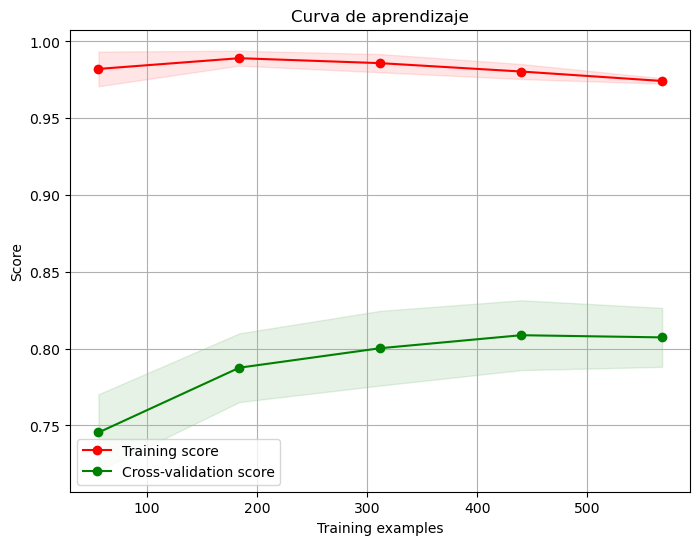

In [222]:
skplt.estimators.plot_learning_curve(
 xgb_classifier,
 X_train,
 y_train,
 title="Curva de aprendizaje",
 scoring="accuracy",
 cv=5,
 shuffle=True,
 random_state=42,
 n_jobs=-1,
 figsize=(8, 6),
)

### Feature importance

<Axes: title={'center': 'Feature Importance XGB Classifier'}>

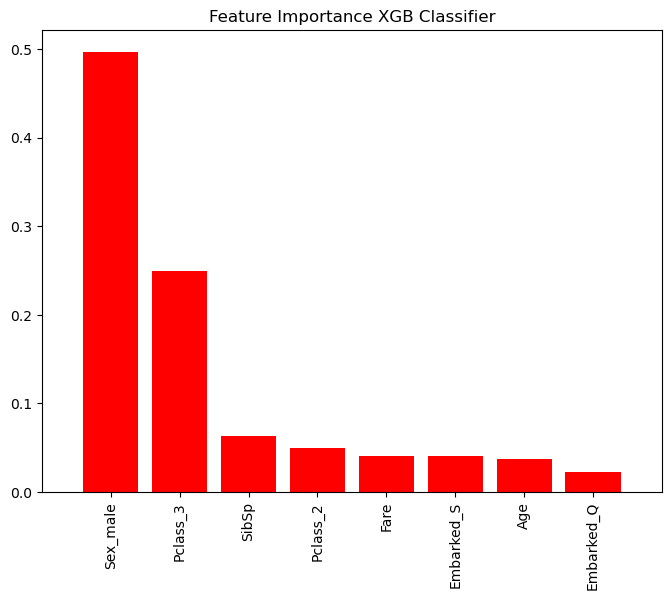

In [223]:
skplt.estimators.plot_feature_importances(
 xgb_classifier,
 feature_names= X.columns,
 figsize=(8, 6),
 title="Feature Importance XGB Classifier",
 x_tick_rotation=90,
)

### Matriz de confusión 

<Axes: title={'center': 'Matriz de confusión para XGB Classifier'}, xlabel='Predicted label', ylabel='True label'>

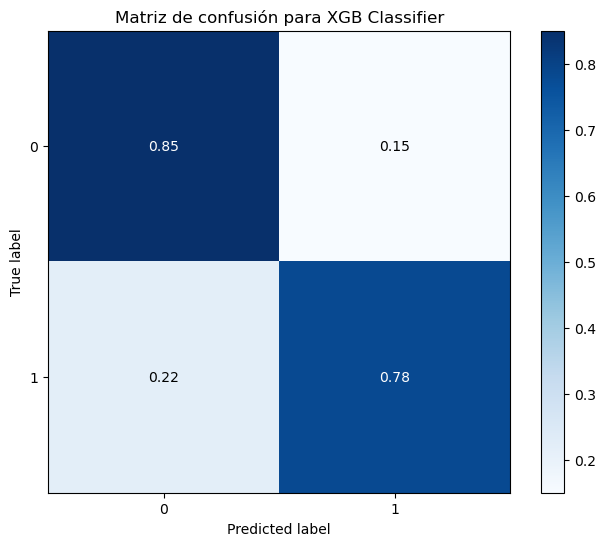

In [224]:
y_pred = xgb_classifier.predict(X_val)

skplt.metrics.plot_confusion_matrix(
 y_val,
 y_pred,
 normalize=True,
 title="Matriz de confusión para XGB Classifier",
 figsize=(8, 6),
)

<Axes: title={'center': 'Curva de ROC - XBG Classifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

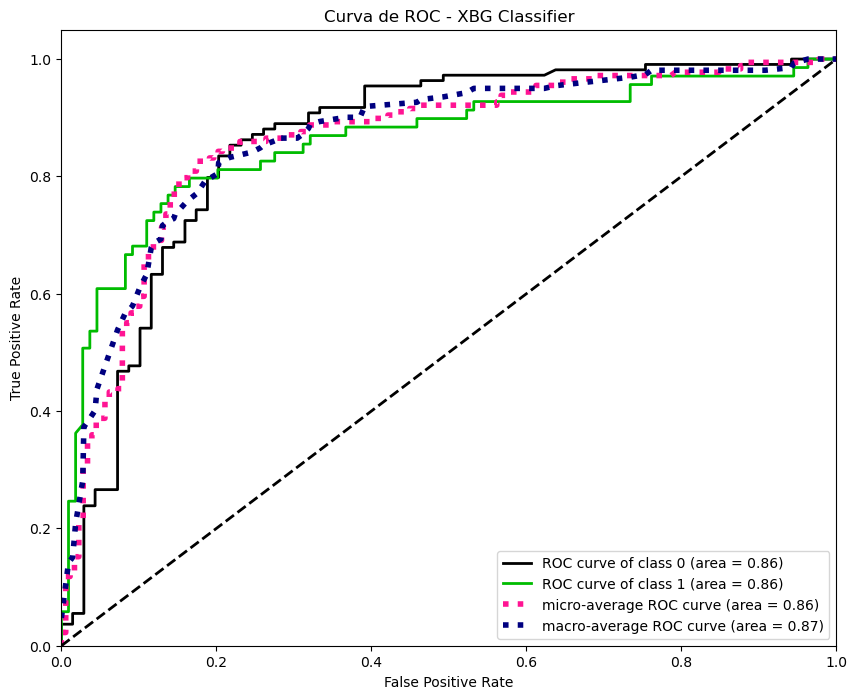

In [225]:
y_probas = xgb_classifier.predict_proba(X_val)
skplt.metrics.plot_roc(
 y_val, y_probas, title="Curva de ROC - XBG Classifier",
 figsize=(10, 8))

### Curva Precision - Recall   

<Axes: title={'center': 'Precision Recall Curve - XBG Classifier'}, xlabel='Recall', ylabel='Precision'>

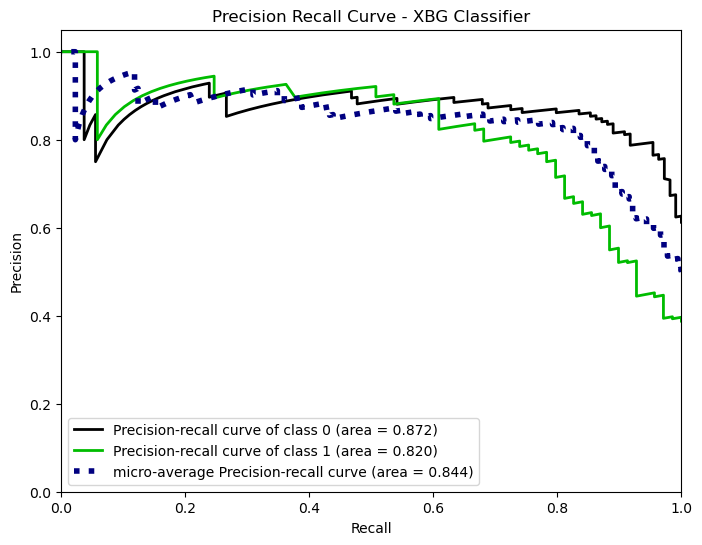

In [226]:
skplt.metrics.plot_precision_recall(
 y_val, y_probas, title="Precision Recall Curve - XBG Classifier", figsize=(8, 6)
)

### Varianza explicada de los componentes de PCA

<Axes: title={'center': 'PCA Component Explained Variances'}, xlabel='First n principal components', ylabel='Explained variance ratio of first n components'>

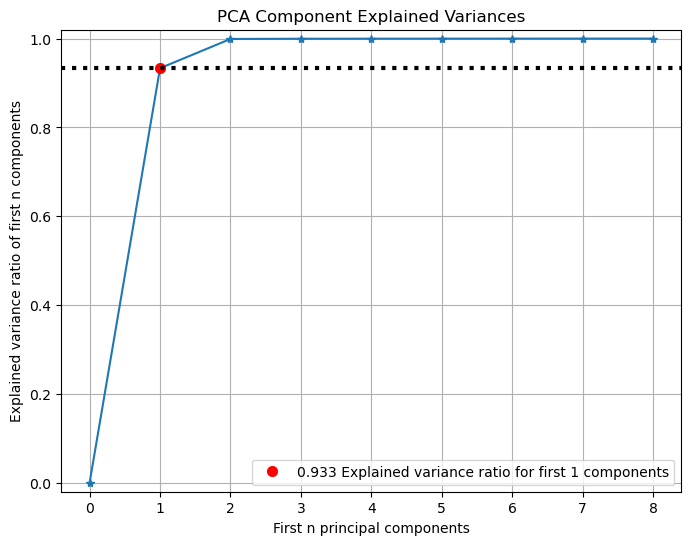

In [227]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42)

# train
pca.fit(X_train)

# Varianza explicada 
skplt.decomposition.plot_pca_component_variance(pca, figsize=(8, 6))

### KS Statistic 

<Axes: title={'center': 'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

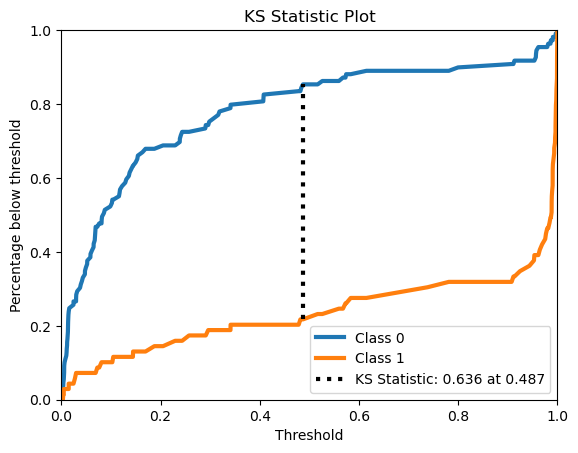

In [228]:
skplt.metrics.plot_ks_statistic( y_val, y_probas)

[Documentación](https://scikit-plot.readthedocs.io/en/stable/index.html)

### By María Belén Camandone